In [16]:
import pandas as pd
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.metrics.distance import jaccard_distance

In [2]:
data = pd.read_csv("../data/told-br/ToLD-BR.csv")
data

,text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20995,@user faz favor vai carai,0.0,0.0,0.0,0.0,0.0,0.0
20996,só queria conhecer alguém que não conhece o he...,1.0,0.0,0.0,0.0,0.0,0.0
20997,"vcs militam na hora errada em cima de memes, p...",0.0,0.0,0.0,0.0,0.0,0.0
20998,@user porra any eu tava c dor de cabeca e fui ...,0.0,0.0,0.0,0.0,0.0,0.0


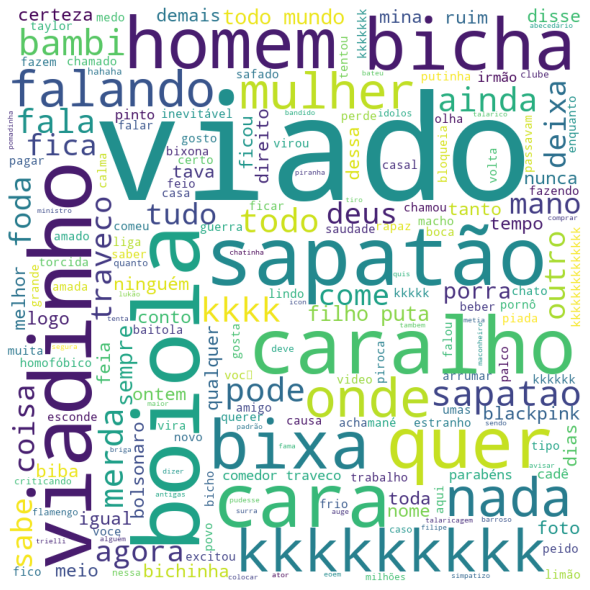

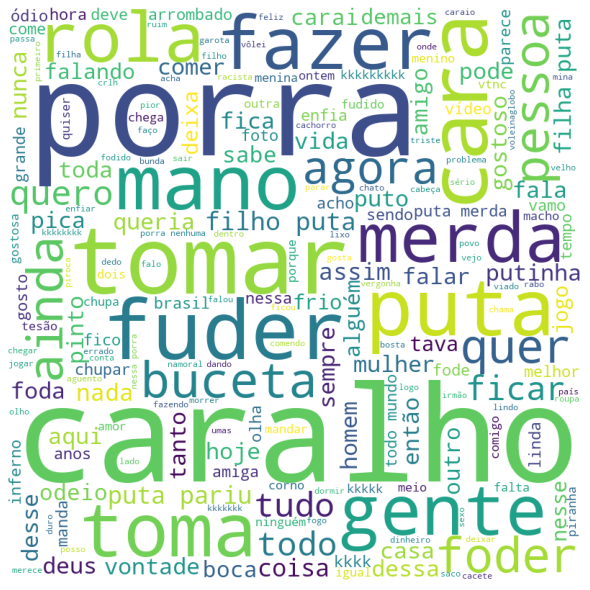

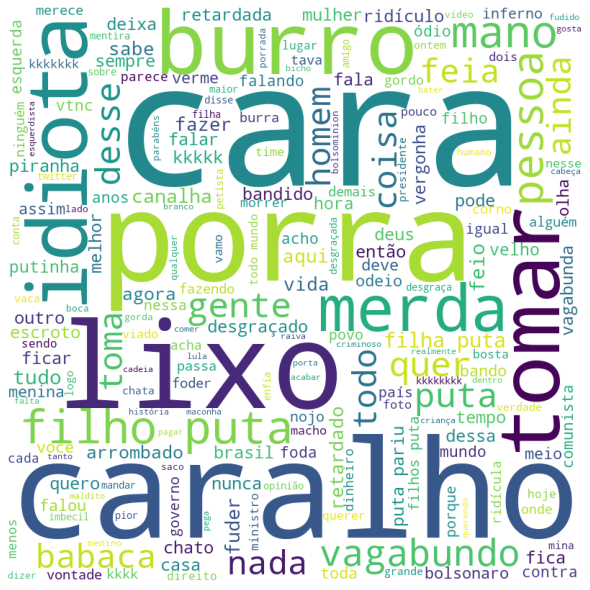

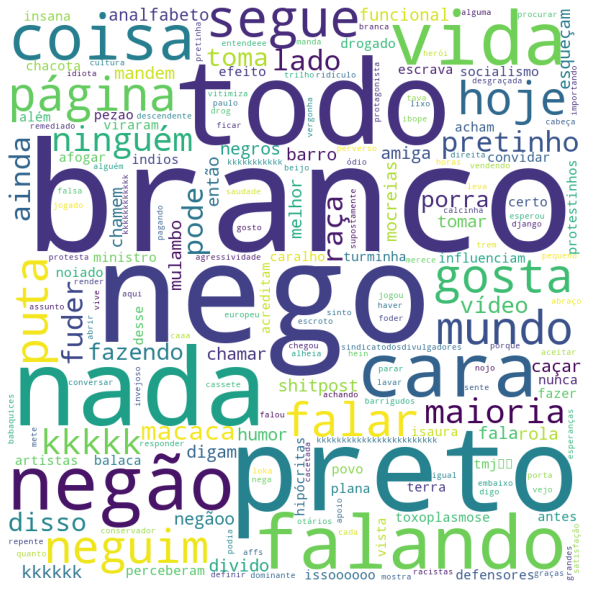

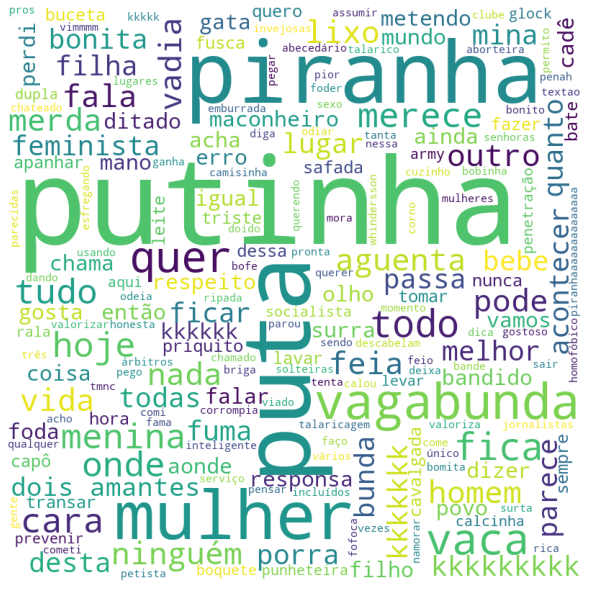

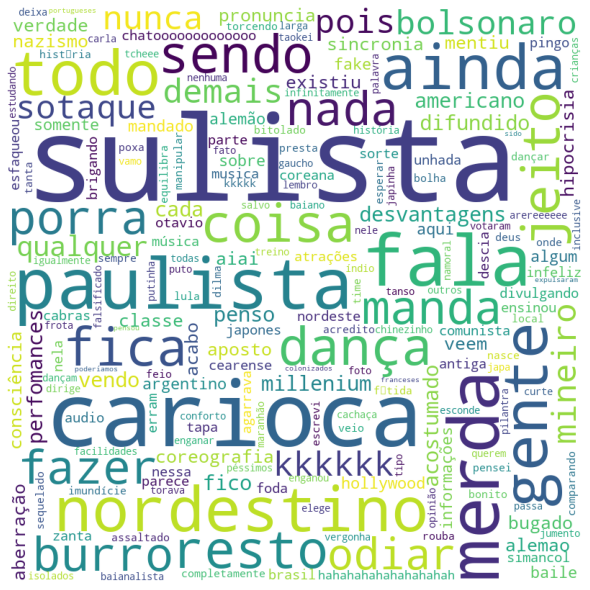

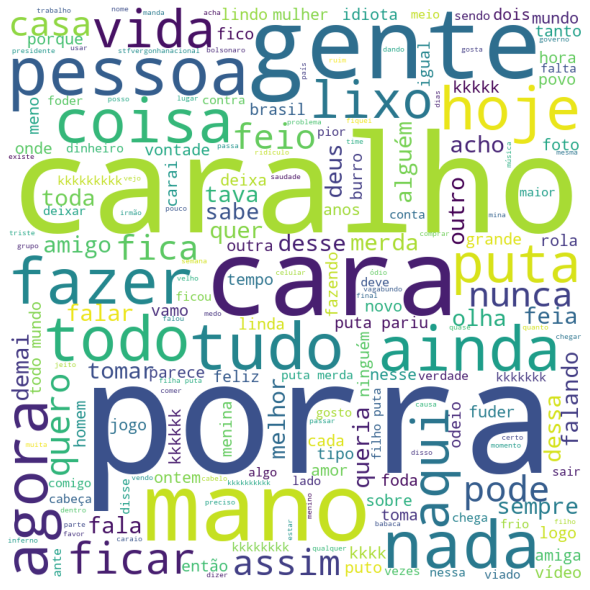

In [35]:
TOPN = 100
freq = pd.DataFrame(columns=data.columns)
freq.rename({"text": "all"}, axis=1, inplace=True)
for CATEGORY in data.columns[1:]:
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stopwords += ["https", "user"]
    tokenized = [nltk.word_tokenize(text.lower(), language="portuguese") for text in data[data[CATEGORY] > 1]["text"]]
    aux = []
    for token in tokenized:
        aux += [word for word in token if word.isalpha() and len(word) > 3 and word not in stopwords]

    freqdist = nltk.FreqDist(aux)
    freq[CATEGORY] = freqdist.most_common(TOPN)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(aux))
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig(f"../data/{CATEGORY}.png")
    
tokenized = [nltk.word_tokenize(text.lower(), language="portuguese") for text in data["text"]]
aux = []
for token in tokenized:
    aux += [word for word in token if word.isalpha() and len(word) > 3 and word not in stopwords]

freqdist = nltk.FreqDist(aux)
freq["all"] = freqdist.most_common(TOPN)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(" ".join(aux))
    
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig("../data/toxic.png")

In [53]:
words = {}
for cat_1 in freq.columns[1:]:
    for cat_2 in freq.columns[1:]:
        if cat_1 != cat_2:
            dist = jaccard_distance({item[0] for item in freq[cat_1]}, {item[0] for item in freq[cat_2]})
            print(f"Distance between {cat_1.upper()} and {cat_2.upper()}: {dist:.2}")
    print()

Distance between HOMOPHOBIA and OBSCENE: 0.73
Distance between HOMOPHOBIA and INSULT: 0.78
Distance between HOMOPHOBIA and RACISM: 0.9
Distance between HOMOPHOBIA and MISOGYNY: 0.8
Distance between HOMOPHOBIA and XENOPHOBIA: 0.94

Distance between OBSCENE and HOMOPHOBIA: 0.73
Distance between OBSCENE and INSULT: 0.57
Distance between OBSCENE and RACISM: 0.84
Distance between OBSCENE and MISOGYNY: 0.77
Distance between OBSCENE and XENOPHOBIA: 0.9

Distance between INSULT and HOMOPHOBIA: 0.78
Distance between INSULT and OBSCENE: 0.57
Distance between INSULT and RACISM: 0.86
Distance between INSULT and MISOGYNY: 0.75
Distance between INSULT and XENOPHOBIA: 0.92

Distance between RACISM and HOMOPHOBIA: 0.9
Distance between RACISM and OBSCENE: 0.84
Distance between RACISM and INSULT: 0.86
Distance between RACISM and MISOGYNY: 0.87
Distance between RACISM and XENOPHOBIA: 0.95

Distance between MISOGYNY and HOMOPHOBIA: 0.8
Distance between MISOGYNY and OBSCENE: 0.77
Distance between MISOGYNY 

In [57]:
print(freq[:10])

               all      homophobia         obscene          insult  \
0    (porra, 1931)     (viado, 59)    (porra, 332)     (puta, 221)   
1  (caralho, 1681)    (boiola, 15)  (caralho, 317)  (caralho, 150)   
2     (puta, 1197)  (viadinho, 13)     (puta, 268)     (cara, 135)   
3      (cara, 816)   (sapatão, 12)    (tomar, 136)    (porra, 122)   
4     (gente, 772)   (caralho, 11)     (fuder, 98)     (lixo, 101)   
5      (mano, 700)      (cara, 10)      (cara, 94)     (filho, 92)   
6      (nada, 668)       (quer, 9)     (merda, 90)     (burro, 87)   
7      (tudo, 652)      (homem, 9)      (mano, 87)     (tomar, 86)   
8     (fazer, 622)       (todo, 9)      (toma, 85)     (merda, 78)   
9     (ainda, 540)      (bicha, 9)     (fazer, 77)    (idiota, 76)   

         racism         misogyny       xenophobia  
0     (nego, 6)    (putinha, 38)    (sulista, 12)  
1   (branco, 6)       (puta, 22)     (carioca, 7)  
2    (preto, 4)    (piranha, 19)        (fala, 4)  
3     (nada, 4)     (

In [54]:
data["text"].apply(len).mean()

86.71980952380953